# Importing Libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

## Reading Data

In [3]:
data=pd.read_csv("titanic_dataset.csv") 
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Setting PassengerId as index

In [4]:
data=data.set_index('PassengerId')

## Identifying Data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


## Shape of Data 
#### (This means dataset has 891 records and 11 columns)

In [6]:
data.shape

(891, 11)

## Finding out columns with missing entries

In [7]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Using a data dictionary dataframe to examine the dataset

In [8]:
datadict = pd.DataFrame(data.dtypes) #Display Datatypes
datadict = datadict.rename(columns={0:'DataType'}) # Renaming column to DataType
datadict['MissingVal'] = data.isnull().sum() #Display Number of Missing Values
datadict['NUnique']=data.nunique() #Display Number of Unique Values
datadict['Count']=data.count() #Display the Count for each column
datadict

,DataType,MissingVal,NUnique,Count
Survived,int64,0,2,891
Pclass,int64,0,3,891
Name,object,0,891,891
Sex,object,0,2,891
Age,float64,177,88,714
SibSp,int64,0,7,891
Parch,int64,0,7,891
Ticket,object,0,681,891
Fare,float64,0,248,891
Cabin,object,687,147,204


## Describing Object Datatypes

In [9]:
data.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


## Describing Numerical Datatypes

In [10]:
data.describe(include=['number'])

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data Analysis

#### Analyzing percentage of passengers survived

In [11]:
data.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

i.e. about 38% of passengers survived whereas about 61% of passengers didn't survive the Titanic disaster.

#### Univariate Analysis

c:\Users\Admin\anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Admin\anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Admin\anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn

<AxesSubplot:xlabel='Age', ylabel='Density'>

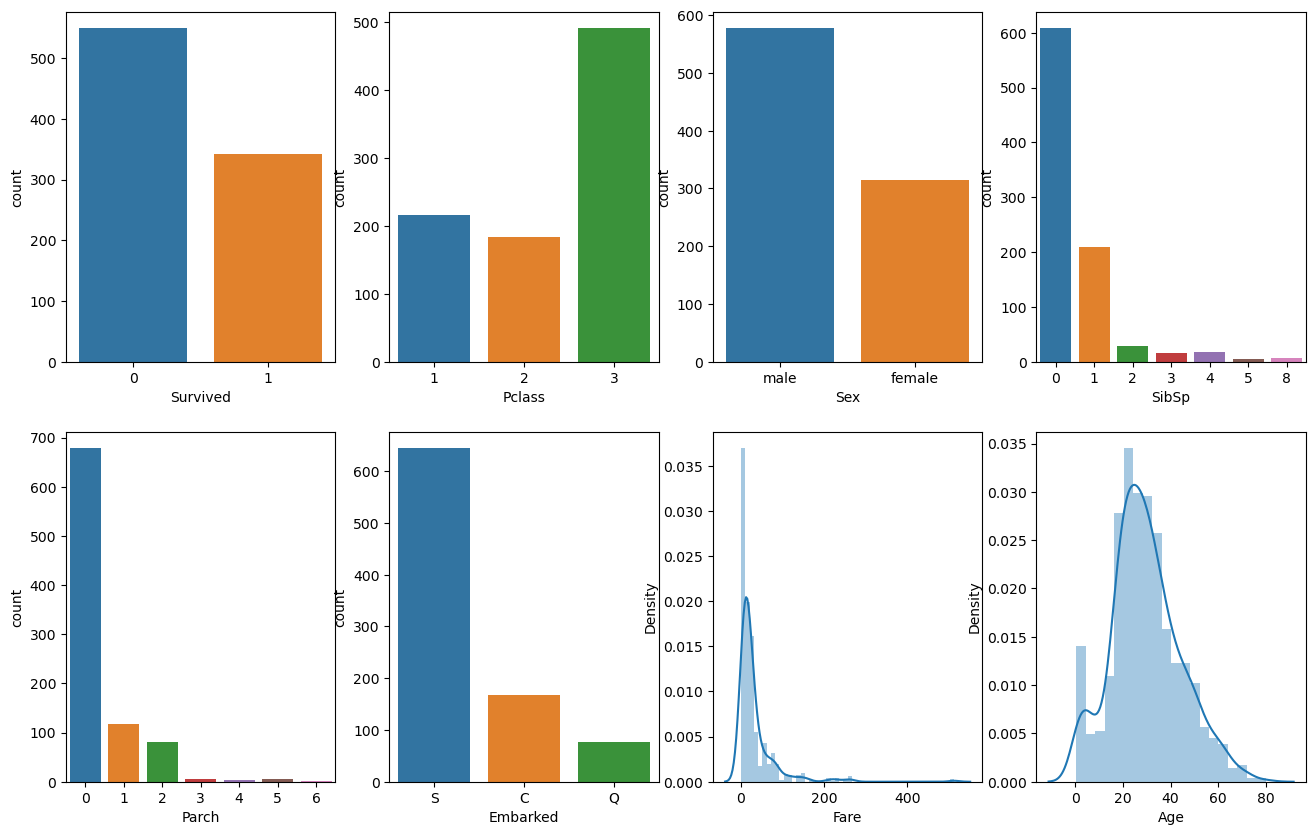

In [12]:
fig, axes = plt.subplots(2, 4, figsize=(16, 10))
sns.countplot('Survived',data=data,ax=axes[0,0])
sns.countplot('Pclass',data=data,ax=axes[0,1])
sns.countplot('Sex',data=data,ax=axes[0,2])
sns.countplot('SibSp',data=data,ax=axes[0,3])
sns.countplot('Parch',data=data,ax=axes[1,0])
sns.countplot('Embarked',data=data,ax=axes[1,1])
sns.distplot(data['Fare'], kde=True,ax=axes[1,2])
sns.distplot(data['Age'].dropna(),kde=True,ax=axes[1,3])

#### Bivariate Analysis

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

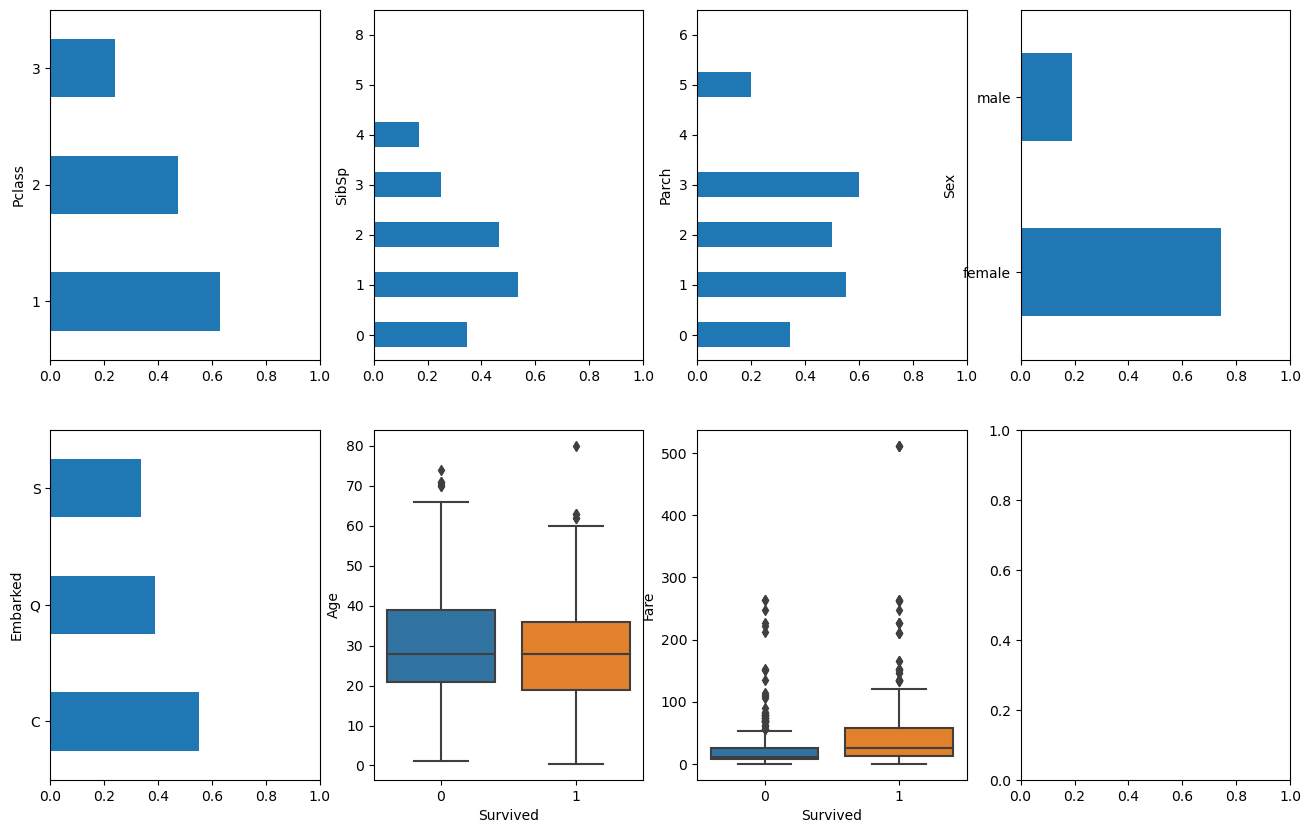

In [13]:
figbi, axesbi = plt.subplots(2, 4, figsize=(16, 10))
data.groupby('Pclass')['Survived'].mean().plot(kind='barh',ax=axesbi[0,0],xlim=[0,1])
data.groupby('SibSp')['Survived'].mean().plot(kind='barh',ax=axesbi[0,1],xlim=[0,1])
data.groupby('Parch')['Survived'].mean().plot(kind='barh',ax=axesbi[0,2],xlim=[0,1])
data.groupby('Sex')['Survived'].mean().plot(kind='barh',ax=axesbi[0,3],xlim=[0,1])
data.groupby('Embarked')['Survived'].mean().plot(kind='barh',ax=axesbi[1,0],xlim=[0,1])
sns.boxplot(x="Survived", y="Age", data=data,ax=axesbi[1,1])
sns.boxplot(x="Survived", y="Fare", data=data,ax=axesbi[1,2])

* Comparing the male and female survival rates, female passengers are more likely to survive.

* Pclass is also related to the survival rates with passengers of Pclass 1 having the best survuval rates of about 60% whereas passengers of Pclass 3 having the worst survuval rates of about 25%.

* Fare is also tied to survuval rates as seen in the plot.


#### Multivariate Analysis

C:\Users\Admin\AppData\Local\Temp\ipykernel_8980\1489348742.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=np.zeros_like(corr, dtype=np.bool),


<AxesSubplot:>

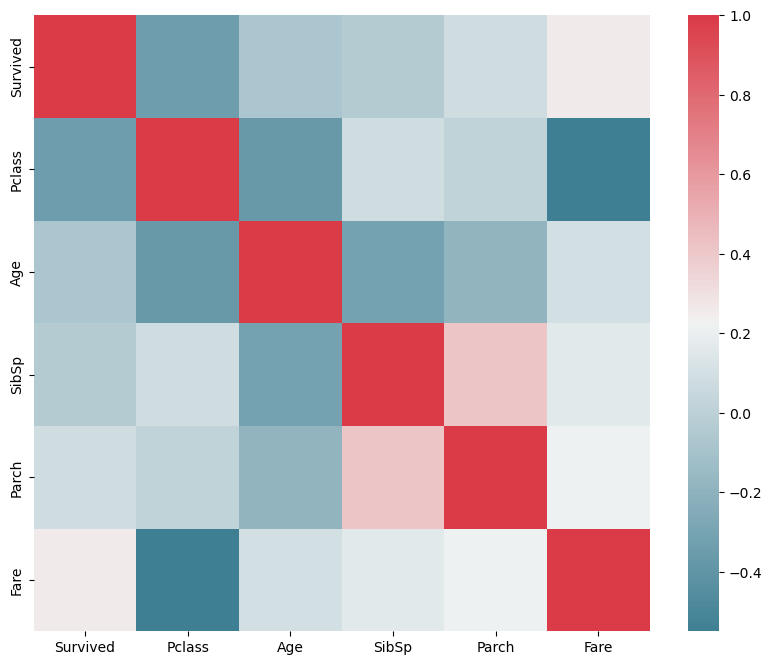

In [14]:
#Constucting a heatmap
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr,
            mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

There is a:
* Positve coorelation between Fare and Survived.
* Negative coorelation between Pclass and Survived.
* Negative coorelation between Fare and Pclass.
* Negative coorelation between Age and Plcass.

Data Preprocessing


In [15]:
#replacing null values with mean values
data['Age'].fillna(data["Age"].mean(),inplace=True)

In [16]:
#Extracting new features
data['FamilyCount']=data['SibSp']+data['Parch']

In [17]:
# Splitting data into categorical and numerical data
numerical_features=[]
categorical_features=[]
for column in data.columns:
    datatype=data[column].dtype
    if datatype=='int64' or datatype=='float64':
        numerical_features.append(column)
    else:
        categorical_features.append(column)
print("Numerical Features:",numerical_features,'\n','Categorical Features:',categorical_features)

Numerical Features: ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilyCount'] 
 Categorical Features: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [18]:
# Creating new column mentioning whether a passenger has a cabin assigned or not
x=data['Cabin'].isnull()
value={True:0,False:1}
x=x.map(value)
data['Has Cabin']=x

# Checking the dataset
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,Has Cabin
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0


Importing Libraries for ML Modelling


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score


Using Logistic Regression because the response varable is a binary classification


In [22]:
X = data[['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked','FamilyCount','Has Cabin',]]   # Not taking Cabin column because it has too many null values
y=data.Survived

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=16)   # Splitting data
lr = LogisticRegression(random_state=16)

In [24]:
#Predicting using Cabin
X_cabin=X_train[['Has Cabin']].values
x_test=X_test[['Has Cabin']].values

lr.fit(X_cabin,y_train)

y_predict=lr.predict(x_test)

In [25]:
cm=confusion_matrix(y_test,y_predict)
cm

array([[121,  16],
       [ 53,  33]], dtype=int64)

In [26]:
accuracy_score(y_test,y_predict)

0.6905829596412556

In [30]:
# Predicting using Age
X_Age = X_train[['Age']].values
x_test=X_test[['Age']].values

lr.fit(X_Age,y_train)

y_predict = lr.predict(x_test)

In [31]:
cm=confusion_matrix(y_test,y_predict)
cm

array([[137,   0],
       [ 86,   0]], dtype=int64)

In [32]:
accuracy_score(y_test,y_predict)

0.6143497757847534

In [33]:
# Predicting using Sex(using a Categorical Variable)
X_sex = pd.get_dummies(X_train['Sex']).values
x_test=pd.get_dummies(X_test['Sex']).values

# Use the fit method to train
lr.fit(X_sex, y_train)
# Make a prediction
y_predict = lr.predict(x_test)


In [34]:
cm=confusion_matrix(y_test,y_predict)
cm

array([[118,  19],
       [ 33,  53]], dtype=int64)

In [35]:
accuracy_score(y_test,y_predict)

0.7668161434977578

In [36]:
# Predicting using PClass(a Categorical Variable)
X_pclass = pd.get_dummies(X_train['Pclass']).values
x_test= pd.get_dummies(X_test['Pclass']).values
lr.fit(X_pclass, y_train)

y_predict = lr.predict(x_test)

In [37]:
cm=confusion_matrix(y_test,y_predict)
cm

array([[114,  23],
       [ 51,  35]], dtype=int64)

In [38]:
accuracy_score(y_test,y_predict)

0.6681614349775785